## Section 8. Model Evaluation

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## 문제 1. ROC Curve 와 AUC 구하기

아래 코드는 
IRIS 데이터 셋을 이용해  Iris Versicolour 와 Iris Virginica 을 구별하는 코드 입니다. 

아래 코드를 수행 했을 때 나온 데이터프레임에는 각 데이터 별로 예측값과 정답값에 대한 정보가 담겨져 있습니다. 이를 이용해 **ROC Curve** 와 **AUC ** 을 구하고 시각화 합니다. 

참고 
- 음성 label 은 0 , Versicolour <br>
- 양성 label 은 1 , Virginica 입니다. 

In [3]:
# 우선 실행해주세요
np.random.seed(1) # 같은 결과를 보장하기 위함
# load Iris dataset 
iris = load_iris()

# XS, YS 
xs = iris['data']
ys = iris['target']
ys_name = iris['target_names']

# extract Versicolour , Virginica dataset 
indices = np.where((ys == 1) | (ys == 2))
xs = xs[indices]
ys = ys[indices]
ys = np.where(ys==1, 0, 1) 

# stop broadcasting
ys = ys.reshape([-1, 1])

# Normalization
xs_norm = (xs - xs.min(axis=0)) / (xs.max(axis=0) - xs.min(axis=0))

# Xs 와 np.ones 을 concatenate for broadcasting  
xs_concat = np.concatenate([xs_norm, 
                            np.ones(shape=[xs_norm.shape[0], 1])], 
                           axis=1)

# Weight 
weight = np.random.normal(size=[xs_concat.shape[-1], 1])

# Training 
lr = 0.01
for i in range(100):
    pred = np.matmul(xs_concat, weight)
    pred = 1 / (1 + np.exp(-pred))

    # Gradient Descent
    diff = pred - ys
    gradients = np.matmul(xs_concat.T, diff)
    weight = weight - gradients*lr
    
    # Accuracy 
    acc = np.mean((pred > 0.5) == ys)
print("Final Accuracy : {:2.2f}%".format(acc*100))
df = pd.DataFrame({
    "Prediction" : pred[:,0],
    "True Label" : ys[:,0]
})

Final Accuracy : 95.00%


In [4]:
df.sample(10)
#df.describe()

,Prediction,True Label
69,0.511604,1
46,0.168278,0
58,0.814259,1
12,0.140934,0
73,0.647265,1
98,0.835785,1
31,0.081775,0
53,0.697934,1
65,0.862991,1
96,0.744327,1


#### 답안지 입력란
* 아래에 답을 서술하여 주세요


In [5]:
# 정답을 입력해주세요
labels = df["True Label"].apply(lambda x : True if x == 1 else False)

def cal_roc(cut_val) :
    Prediction_ = df.Prediction.apply(lambda x : True if x >= cut_val else False)
    #print(Prediction_)
    
    TP = Prediction_ & labels
    TP_num = TP.sum()
    #print(TP_num)

    FN = (~Prediction_) & (labels)
    FN_num = FN.sum()
    #print(FN_num)

    TN = (~Prediction_) & (~labels)
    TN_num = TN.sum()
    #print(TN_num)

    FP = (Prediction_) & (~labels)
    FP_num = FP.sum()
    #print(FP_num)

    recall = TP_num / (TP_num + FN_num) #label이 T중에 pred이 T한것
    precision = TP_num / (FP_num + TP_num) #pred이 T중에 label이 T인것
    
    fpr = FP_num/(FP_num+TN_num)
    #print(recall)
    return recall, fpr

ran = np.linspace(0.0, 1., 100)
#print(ran)
tpr_list = []
fpr_list = []
for i in ran :
    tpr, fpr = cal_roc(i)
    #print(re)
    fpr_list.append(fpr)
    tpr_list.append(tpr)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in long_scalars


0.9892000000000003


Text(0, 0.5, 'TPR')

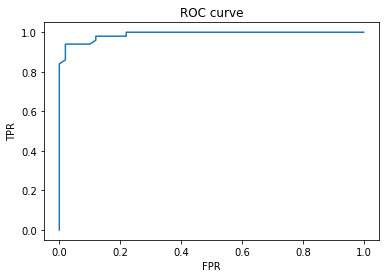

In [6]:
prev_t = tpr_list[0]
prev_f = fpr_list[0]

tpr_list_ = tpr_list[1:]
fpr_list_ = fpr_list[1:]

auc = 0
for cur_t, cur_f in zip(tpr_list_, fpr_list_) :
    t_dif =  (prev_t + cur_t)/2
    f_dif =  prev_f - cur_f
    seg = (t_dif * f_dif)
    auc += seg
    prev_f = cur_f
    prev_t = cur_t

print(auc)
plt.title("ROC curve")
plt.plot(fpr_list, tpr_list)
plt.xlabel("FPR")
plt.ylabel("TPR")

#### 정답 확인

정답 : AUC , ROC curve 는 아래와 같은 그림이 나와야 정답입니다

![Imgur](https://i.imgur.com/nOOc7Va.png)

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/19

---